In [3]:
from tqdm.notebook import tqdm
import numpy as np
from numpy import log, exp, sqrt
import matplotlib.pyplot as plt

import torch

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.util import (
    generate_heston_paths, 
    generate_gbm_paths,
    get_mc_price
)

from src.model import Environment, Agent

In [17]:
call = lambda x, k: np.maximum(x-k, 0)
put  = lambda x, k: np.maximum(k-x, 0)

nsim = 10000; nstep = 365
t1 = 0; t2 = 1
s_0 = 100; r = 0.10; q = 0.00
path_kwargs = dict(v=0.40)
k = 100

env = Environment(
    nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q,
    path_kwargs=path_kwargs, h=call, k=k, gbm=True
)

agent = Agent(
    env=env, obssize=2, actsize=2, hidden_dim=128, depth=3, lr=0.001, buffer_size=512, batch_size=64,
    buffer_interval=8, model_interval=128, gamma=0.99, eps=0.25, eps_decay=0.995, eps_min=0.05
)

losses, rewards = agent.train(nepisode=1000, notebook=True)

Episode:   0%|          | 0/1000 [00:00<?, ?it/s]

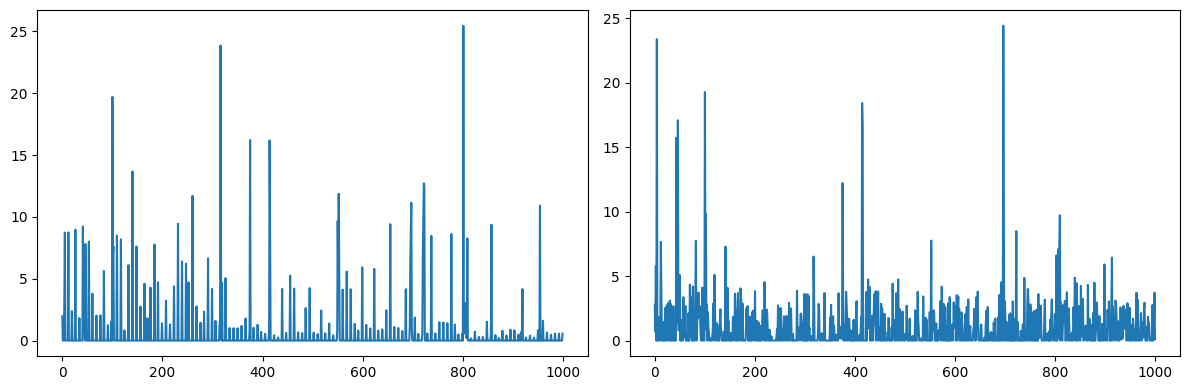

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(losses); ax[1].plot(rewards)
plt.tight_layout()

Sandbox

In [12]:
# seed = 1
# rng = np.random.default_rng(seed=seed)

# prices = generate_gbm_paths(rng=rng, nsim=nsim, nstep=nstep, t1=t1, t2=t2, s_0=s_0, r=r, q=q, v=v)

# get_mc_price(prices=prices, t1=t1, t2=t2, h=put, k=k, r=r)